# Annuities
Source: http://www1.maths.leeds.ac.uk/~jitse/math1510/notes-ch2.pdf

- An annuity is a sequence of payments with fixed frequency. Originally annuities referred to annual payments only.
- A life-annuity pays regular income until death. An annuity with fixed nuimber of payments is called annuity certain. This note will focus on annuity certains.
- Annuity immediate: Regular series of payments at the end of every period. This note will focus exclusively on annual immediates.

- $i_{[p]}$: **interest rate** payble per compound (conversion) period $p$
- $i^{(p,t)} \equiv i^{(p)} = p \cdot i_{[p]}$: **nominal interest rate** payble per compound (conversion) period $p$ (usually months), quoted per base time unit $t$ (usually per annum, p.a.)
    - For example, 8% p.a. nominal interest rate payable quarterly means that payments are made at monthly frequency per rate of $i_{[1/4]} = \frac{8\%}{4} = 2\% $
    - For example, 2% p.m. nominal interest rate payable yearly means that payments are made at yearly frequency per rate of $i_{[12]} = 2\% * 12 = 24\% $

- $i^{(e,p,t)} \equiv i^{(e,p)}$: **Effective interest rate** corresponding to nominal interes rate $i^{(p)}$. It is the rate to be appliead at base time unit that yields equivalent interest accrual to conversion rate $i_{[p]}$. Can be solved for from $$1 + i^{(e,p)} = \big(  1 + \frac{i^{(p)}}{p} \big)^{p}$$ Above solved for $ i^{(p)} $: $$i^{(p)} = p \ \big[ \big( 1 + i^{(e,p)} \big)^{\frac{1}{p}} - 1 \big] $$ Above solved for $ i^{(e,p)} $: $$i^{(e,p)} = \big(  1 + \frac{i^{(p)}}{p} \big)^{p} - 1$$ 


 

** Accumulated value (or future value) of annuity after $n$ conversion periods:**

Accumulated value (or future value) of annuity (paying C units at the end of each conversion period)

$$cs_{n,i} = C \cdot s_{n,i} = C \cdot  \frac{\big(1+ i_{[p]} \big)^{np} - 1}{i_{[p]}}, \quad i_{[p]} \neq 0, \ n > 0$$

where $n$ denotes the amount of conversion periods, $i_{[p]}$ is the conversion period interest rate, and $C$ is the conversion period cash flow.

Many times parameters are not given for the conversion period (e.g. month) but rather for a base time unit (usually year), i.e. $i^{(p)}$ (ther are $p$ conversion period in base period). For example, consider that interest rate is given quoted as p.a. Then simply we first have to calculate the per-conversion period interst rate from $i_{[p]} = \frac{i \ ^{(p)}}{p}$ and plug it into the formula above. If $i_{[p]}=0$ then $s_{n,i} = n$.

Notice that in section 2.4 of the reference paper there is a subtlety when calculating annuities payble e.g. monthly. Forward and present values in the reference already contain scaling by $p$, so that when the cash flow is introduced it is in the units of base time period of year. I don't prefer this approach but rather use conversion period units whereever possible.

------------------------------
A special case of the $n$th period accumulated value is 0th period accumulate value $s_{0,i}$. This has a special name, *present value of annuity*. 

** Present value of n-period annuity**
Present value of n-period annuity paying $C$ units at the end of each conversion period is

$$ca_{n,i} = C \cdot a_{n,i} = C \cdot \frac{1 - \big(1+ i_{[p]} \big)^{-np}}{i_{[p]}}, \quad i \neq 0$$

If $i=0$ then $a_{n,i} = n$.


** Relationship between future value and present value of annuity**

$$a_{n,i}  = \frac{s_{n,i}}{(1+i_{[p]})^n} $$


Nyt seuraavaksi läppää siitä mikä osuus on korkoa ja mikä osa lyhennsytä.

### Examples

In [93]:
import math
import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline


In [23]:
def annuity_pv(rate, nper, C):
    return C * ( 1 - math.pow( 1 + rate, -nper ) ) / (rate)

def annuity_fv(rate, nper, C):
    return C * ( math.pow( 1 + rate, nper ) -1 ) / (rate)

In [69]:
def annuity_pmt(rate, nper, pv):    
    x = math.pow(1 + rate, nper);
    return (pv * x * rate) / (x - 1);


In [10]:
# Example 2.4.2 from reference paper

# Base period yearly
n = 10 # number of years
p = 1/2 # how many times compounded yearly
i_p_effective = 0.07 # effective yearly interest rate. THIS IS NOT p.a. interest rate compounded once in two years
i_conv_nominal = p * ( math.pow(1+i_p_effective,1/p) - 1) # twice a year nominal rate, quoted at base interval
i_conv_effective = i_conv_nominal/p # twice a year effective rate
C_conv = 1000 # cash flow at conversion time unit

# Calculate and display present value
ca = annuity_pv(i_conv_effective, n*p, C_conv)
display(ca)

# Same using numpy's built in functions
display(np.pv(rate = i_conv_effective, nper = n*p, pmt = -C_conv, fv = 0, when = 'end'))


3393.0345608370053

3393.0345608370053

In [17]:
# Test from http://www.zenwealth.com/BusinessFinanceOnline/TVM/OtherCompounding.html
# Find the Present Value of an annuity of $100 per month for 2 years if the interest
# rate is 12% compounded monthly.

# Base period yearly
n = 2 # number of years
p = 12 # how many times compounded yearly
i_base_nominal = 0.12 # nominal rate quaoted at base interval
i_conv_effective = i_base_nominal/p # monthly effective rate
C_conv = 100 # cash flow at conversion time unit

# Calculate and display present value
ca = annuity_pv(i_conv_effective, n*p, C_conv)
display(ca)

# Same using numpy's built in functions
display(np.pv(rate = i_conv_effective, nper = n*p, pmt = -C_conv, fv = 0, when = 'end'))


2124.3387257627865

2124.3387257627869

In [22]:
# Test from http://www.zenwealth.com/BusinessFinanceOnline/TVM/OtherCompounding.html
# Find the Future Value at the end of 3 years of an annuity of $100 per quarter for 
# 3 years if the interest rate is 8% compounded quarterly.

# Base period yearly
n = 3 # number of years
p = 4 # how many times compounded yearly
i_base_nominal = 0.08 # nominal rate quaoted at base interval
i_conv_effective = i_base_nominal/p # quarterly effective rate
C_conv = 100 # cash flow at conversion time unit

# Calculate and display present value
cs = annuity_fv(i_conv_effective, n*p, C_conv)
display(cs)

# Same using numpy's built in functions
display(np.fv(rate = i_conv_effective, nper = n*p, pmt = -C_conv, pv = 0, when = 'end'))


1341.2089728127273

1341.2089728127273

### Loan example from reference paper section 2.6

numpy pmt= 347.7617251391697, own function pmt = 347.7617251391697


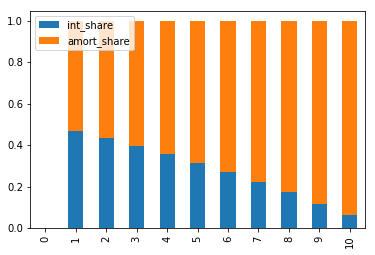

In [85]:
# Base interval year
pv = 2500 # loan amount
i_conv_effective = 0.065 # effective conversion period interest rate
n = 10 # number of conversion periods
nper = n

C_check = -np.pmt(rate = i_conv_effective, nper = nper, pv = pv, fv=0, when='end')
C = annuity_pmt(rate = i_conv_effective, nper = nper, pv = pv)
print("numpy pmt= {}, own function pmt = {}".format(C_check,C))

# Amount after k years
years_l = []
outs_l = []
intr_part_l = []
amorz_part_l = []
for k in range(nper):
    years_l.append(k)
    #outs = -np.pv(rate = i_conv_effective, nper = nper-k, pmt = C, fv = 0, when = 'end')
    outs = annuity_pv(rate = i_conv_effective, nper = nper-k, C = C)    
    outs_l.append(outs)
    if k != 0:
        #intr_part = i_conv_effective * -np.pv(rate = i_conv_effective, nper = nper-k+1, pmt = C, fv = 0, when = 'end')
        intr_part = i_conv_effective * annuity_pv(rate = i_conv_effective, nper = nper-k+1, C = C)
        intr_part_l.append(intr_part)
        amorz_part_l.append(C - intr_part)
        continue
    intr_part_l.append(np.nan)
    amorz_part_l.append(np.nan)    
    
df = pd.DataFrame([years_l, outs_l, intr_part_l,amorz_part_l]).T
df.columns = ['year','out_bal','interest_part','amortization_part']
df['installment'] = C
df['int_share'] = df['interest_part'] / df['installment']
df['amort_share'] = df['amortization_part'] / df['installment']

#display(df)

df[['int_share','amort_share']].plot.bar(stacked = True)



### Example mortgage loan with monthly conversion rate

numpy pmt= 1443.9277404752143, own function pmt = 1443.9277404752143


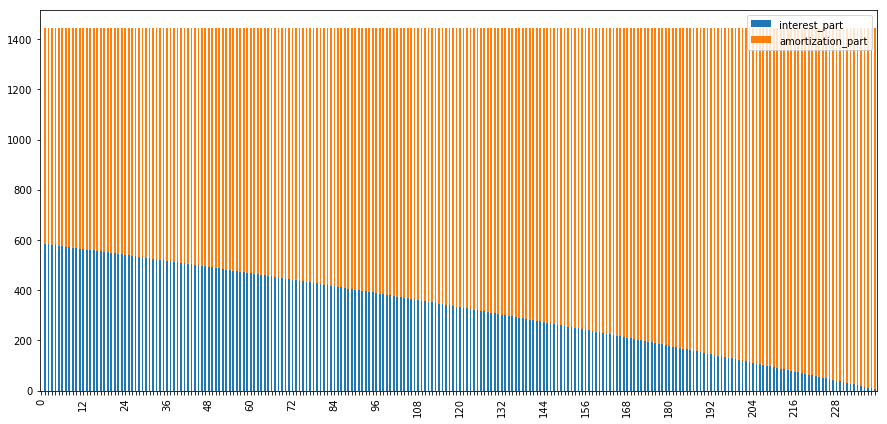

In [115]:
# Base interval year
pv = 270000 # loan amount
i_base_nominal = 0.026 # nominal rate quoted p.a.
i_conv_effective = i_base_nominal/p # monthly effective rate
n = 20 # number of years
p = 12 # months in a year
nper = n*p # number of conversion periods

C_check = -np.pmt(rate = i_conv_effective, nper = nper, pv = pv, fv=0, when='end')
C = annuity_pmt(rate = i_conv_effective, nper = nper, pv = pv)
print("numpy pmt= {}, own function pmt = {}".format(C_check,C))

# Amount after k years
years_l = []
outs_l = []
intr_part_l = []
amorz_part_l = []
for k in range(nper):
    years_l.append(k)
    #outs = -np.pv(rate = i_conv_effective, nper = nper-k, pmt = C, fv = 0, when = 'end')
    outs = annuity_pv(rate = i_conv_effective, nper = nper-k, C = C)    
    outs_l.append(outs)
    if k != 0:
        #intr_part = i_conv_effective * -np.pv(rate = i_conv_effective, nper = nper-k+1, pmt = C, fv = 0, when = 'end')
        intr_part = i_conv_effective * annuity_pv(rate = i_conv_effective, nper = nper-k+1, C = C)
        intr_part_l.append(intr_part)
        amorz_part_l.append(C - intr_part)
        continue
    intr_part_l.append(np.nan)
    amorz_part_l.append(np.nan)    
    
df = pd.DataFrame([years_l, outs_l, intr_part_l,amorz_part_l]).T
df.columns = ['year','out_bal','interest_part','amortization_part']
df['installment'] = C
df['int_share'] = df['interest_part'] / df['installment']
df['amort_share'] = df['amortization_part'] / df['installment']

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
df[['interest_part','amortization_part']].plot.bar(stacked = True, ax = ax)
every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
